In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Input, Conv2D, Convolution3D, MaxPooling2D, Dense, Dropout, Flatten, Activation

#### data preparation

In [0]:
from keras.datasets import cifar10

In [52]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [53]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [54]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [0]:
# convert the label into one hot encoded
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

### CNN Model

In [104]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu',input_shape = (32, 32, 3)))
model.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(2, 2))
model.add(Convolution2D(64, kernel_size=(5, 5), activation='relu'))
model.add(Convolution2D(32, kernel_size=(5, 5), activation='relu'))
model.add(Convolution2D(16, kernel_size=(3, 3), activation='relu'))
model.add(Convolution2D(8, kernel_size=(3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))


## compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
dropout_26 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 10, 10, 64)        102464    
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 6, 6, 32)          51232     
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 4, 4, 16)          4624      
__________

In [105]:
hist = model.fit(x_train,y_train,epochs=50,shuffle=True, batch_size=512, validation_split=0.135)

Train on 43250 samples, validate on 6750 samples
Epoch 1/50
43250/43250 [==============================] - 7s 158us/step - loss: 2.0883 - acc: 0.1927 - val_loss: 1.9154 - val_acc: 0.2370
Epoch 2/50
43250/43250 [==============================] - 5s 119us/step - loss: 1.8541 - acc: 0.2626 - val_loss: 1.7851 - val_acc: 0.2929
Epoch 3/50
43250/43250 [==============================] - 5s 119us/step - loss: 1.7282 - acc: 0.3178 - val_loss: 1.7417 - val_acc: 0.3301
Epoch 4/50
43250/43250 [==============================] - 5s 117us/step - loss: 1.6461 - acc: 0.3647 - val_loss: 1.5895 - val_acc: 0.3905
Epoch 5/50
43250/43250 [==============================] - 5s 118us/step - loss: 1.5753 - acc: 0.4007 - val_loss: 1.5616 - val_acc: 0.4133
Epoch 6/50
43250/43250 [==============================] - 5s 118us/step - loss: 1.5147 - acc: 0.4285 - val_loss: 1.5314 - val_acc: 0.4080
Epoch 7/50
43250/43250 [==============================] - 5s 119us/step - loss: 1.4639 - acc: 0.4498 - val_loss: 1.4606 - v

training_loss = 0.5150463764929358    val_loss = 0.9004896052325213
training_acc = 81.4890173509631    val_acc = 70.08888886239794


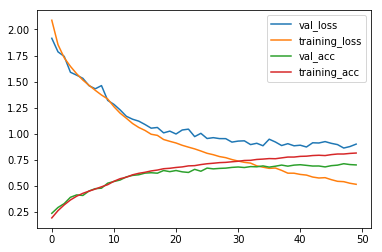

In [106]:
# plot loss
print("training_loss =", hist.history['loss'][-1],  "   val_loss =", hist.history['val_loss'][-1])
print("training_acc =", hist.history['acc'][-1]*100, "   val_acc =", hist.history['val_acc'][-1]*100)
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['loss'], label='training_loss')

# plot accuracy
plt.plot(hist.history['val_acc'], label='val_acc')
plt.plot(hist.history['acc'], label='training_acc')
plt.legend()
plt.show()

In [107]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 130us/step


[0.9412018810272217, 0.6944]